# import dataset and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score


from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv(r"C:\Users\savad\Desktop\pass.csv",encoding='latin-1')
df.head(20)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


In [3]:
df=df[0:200000]

In [4]:
df.shape

(200000, 2)

In [5]:
df.isna().sum()

password    0
strength    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  200000 non-null  object
 1   strength  200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
df.strength.unique()

array([1, 2, 0], dtype=int64)

0 means->the password strenght is weak

1 means->the password strenght is medium

2 means->the password strenght is strong

In [9]:
df["strength"] = df["strength"].map({0: "Weak", 
                                         1: "Medium",
                                         2: "Strong"})
df.head()

,password,strength
0,kzde5577,Medium
1,kino3434,Medium
2,visi7k1yr,Medium
3,megzy123,Medium
4,lamborghin1,Medium


In [10]:
df['count']=df['password'].apply(lambda x:len(x))

In [11]:
df.head(10)

,password,strength,count
0,kzde5577,Medium,8
1,kino3434,Medium,8
2,visi7k1yr,Medium,9
3,megzy123,Medium,8
4,lamborghin1,Medium,11
5,AVYq1lDE4MgAZfNt,Strong,16
6,u6c8vhow,Medium,8
7,v1118714,Medium,8
8,universe2908,Medium,12
9,as326159,Medium,8


# Data visualization

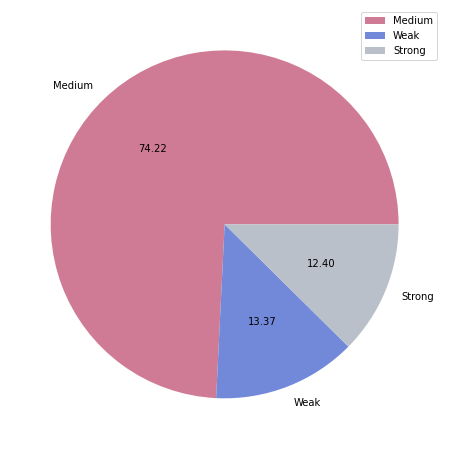

In [12]:
plt.figure(figsize=(8,8))
labels=df['strength'].value_counts().keys()
plt.pie(df['strength'].value_counts().values,labels=labels,colors=['#d07b95','#7289da',"#B9C0C9"],autopct='%.2f')
plt.legend(labels)
plt.show()

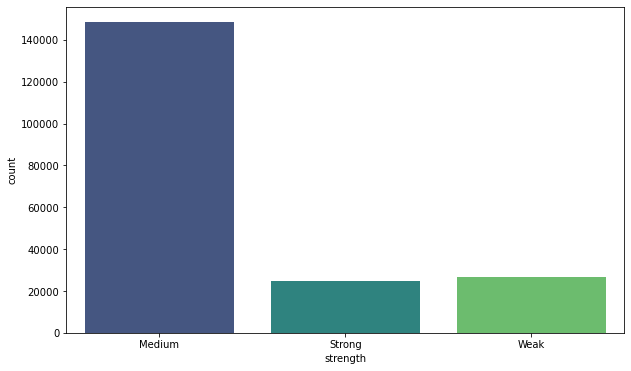

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['strength'],palette='viridis')
plt.show()


# vectorization  and buliding model

In [14]:
df['strength']=df['strength'].map({'Weak':0,'Medium':1,'Strong':2})

In [15]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character
  
x = np.array(df["password"])
y = np.array(df["strength"])

tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=0.05,random_state=42)

In [16]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9462


# Model Evaluation

The classification report is :                precision    recall  f1-score   support

           0       0.95      0.78      0.85      1328
           1       0.94      0.99      0.96      7398
           2       0.96      0.89      0.92      1274

    accuracy                           0.95     10000
   macro avg       0.95      0.88      0.91     10000
weighted avg       0.95      0.95      0.94     10000

accuracy score is :  0.9462


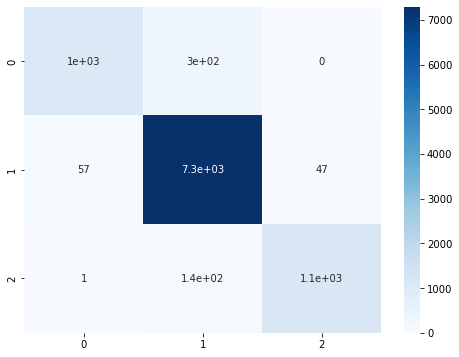

In [17]:
y_pred=model.predict(x_test)
print('The classification report is : ',classification_report(y_test,y_pred))
print('accuracy score is : ',accuracy_score(y_test,y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.show()

## Prediction

In [18]:
input=input('Enter password')
data = tdif.transform([input]).toarray()

Enter passwordSavad123


In [19]:
model.predict(data)

array([1], dtype=int64)